# Predicting Book Ratings based on Title and Description using Semi-Supervised Learning

## Problem Statement:

In the world of helping writers and readers, we face the challenge of improving how we recommend books. We want to suggest books that people will really enjoy, but we have limited information about how good each book is. To solve this, we're working on a clever computer program that learns from a small group of rated books and a big group of unrated ones. This will help us make better guesses about how much people might like a book, so we can give better recommendations. Our goal is to use this technology to overcome the challenge of limited information and provide more accurate and exciting book suggestions to our users.

## Business Goal:

Our main aim in helping writers and readers is to make finding great books easier and more accurate. We're using a smart computer program that learns from a few rated books and lots of unrated ones to guess how good a book might be. This helps us suggest books that people will probably like. By using this new technology, we want to be even better at recommending interesting books and become a trusted place for finding awesome reads.

##### **Pipelines performed:**

Following eight major tasks has been performed in this notebook
:

1. Data loading and cleaning
2. Exploratory data analysis (EDA)
4. Sperate Labeled Data
5. Text Preprocessing 
6. Base Model building using supervised learning
7. Multiple Model Building using supervised learning
8. Model Building Using Semi-supervised Learning

## # **Importing the necessary libraries**



In [2]:
!apt-get install default-jre
!java -versionb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra
  libatk-wrapper-java libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6
  libxxf86dga1 openjdk-11-jre x11-utils
0 upgraded, 12 newly installed, 0 to remove and 16 not upgraded.
Need to get 3,720 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:3 http://archive.ubuntu

In [3]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=42842b06b12b223d8202be758efaba7ffa7c0bb67fa49d0b96fbb4caf406375b
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [174]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
import h2o
from h2o.automl import H2OAutoML

import warnings
warnings.filterwarnings('ignore')

In [37]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn3kl__em
  JVM stdout: /tmp/tmpn3kl__em/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn3kl__em/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         02 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.2
H2O_cluster_version_age:    19 days
H2O_cluster_name:           H2O_from_python_unknownUser_84oweh
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Loading and Cleaning

In [3]:
df = pd.read_csv('books_data.csv')

In [4]:
df = df[['Title', 'description', 'ratingsCount']]

df = df.rename(columns={col: col.lower() for col in df.columns})

filtered_df = df[df['description'].notna()]
filtered_df.shape

(143962, 3)

In [5]:
q1 = filtered_df['ratingscount'].quantile(0.01)
q75 = filtered_df['ratingscount'].quantile(0.75)
filtered_df['ratingscount'] = filtered_df['ratingscount'].clip(lower=q1, upper=q75)

filtered_df.head()

title  \
1                           Dr. Seuss: American Icon   
2              Wonderful Worship in Smaller Churches   
3                      Whispers of the Wicked Saints   
5  The Church of Christ: A Biblical Ecclesiology ...   
8                           Saint Hyacinth of Poland   

                                         description  ratingscount  
1  Philip Nel takes a fascinating look into the k...           NaN  
2  This resource includes twelve principles in un...           NaN  
3  Julia Thomas finds her life spinning out of co...           NaN  
5  In The Church of Christ: A Biblical Ecclesiolo...           5.0  
8  The story for children 10 and up of St. Hyacin...           NaN

* removing outlier values from ratingscount limiting the ratings from 1 to 5

## Exploratory Data Analysis

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

eda_df = filtered_df.copy()

### Document Length Histogram

In [105]:
doc_lens = [len(d) for d in eda_df.description]

fig = px.histogram(x=doc_lens, nbins=200, title="Document Length Histogram")
fig.update_layout(xaxis_title="Document Length", yaxis_title="Frequency")
fig.update_xaxes(range=[0, 5000])
fig.show()

* The graph shows how long the descriptions are in the dataset. Most of the descriptions are short, between 0 and 200 characters. This means that many of the descriptions are brief and to the point.

### Ratings Distribution

In [110]:
fig_ratings = px.histogram(df, x='ratingscount', title='Ratings Distribution')
fig_ratings.update_xaxes(range=[0, 100])
fig_ratings.show()

* The histogram plot depicting the distribution of ratings reveals an unexpected observation. While ratings are typically confined within the range of 1 to 5, this histogram displays values exceeding 5. This divergence suggests the presence of outliers in the dataset, indicating potential inaccuracies or inconsistencies in the ratings data. Further investigation is recommended to identify and address these outliers, ensuring the integrity of the ratings information for accurate analysis and interpretation.

### Class Balance

In [123]:
value_counts = filtered_df['ratingscount'].value_counts()
fig_ratings = px.bar(value_counts, title='Class Balance')
fig_ratings.show()

* The bar chart illustrates the distribution of ratings after the removal of outliers. However, the remaining ratings exhibit an imbalanced distribution, with some ratings appearing more frequently than others. This imbalance suggests a potential challenge for accurate prediction or analysis. In subsequent steps, it will be crucial to apply appropriate balancing techniques to address this disparity and ensure a more representative and reliable representation of the data during further analysis and modeling.

In [125]:
def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [126]:
top_30_unigrams = get_top_n_bigram(filtered_df.description, ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(filtered_df.description, ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(filtered_df.description, ngram=3, top=30)

### Top 30 Unigrams

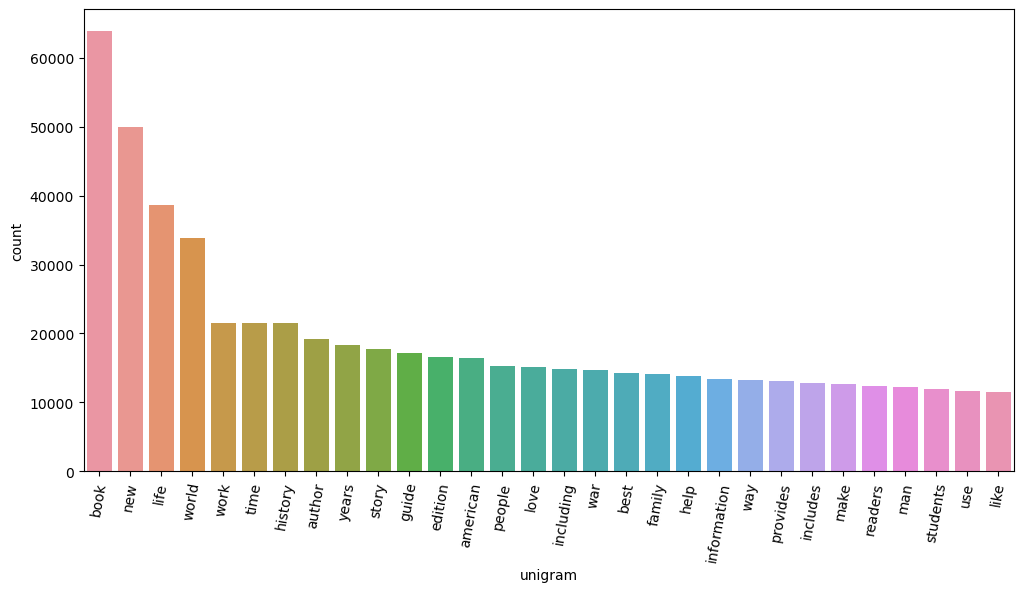

In [127]:
df1 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df1['unigram'], y=df1['count'])
plt.xticks(rotation = 80)
plt.show()

### Top 30 Bigrams

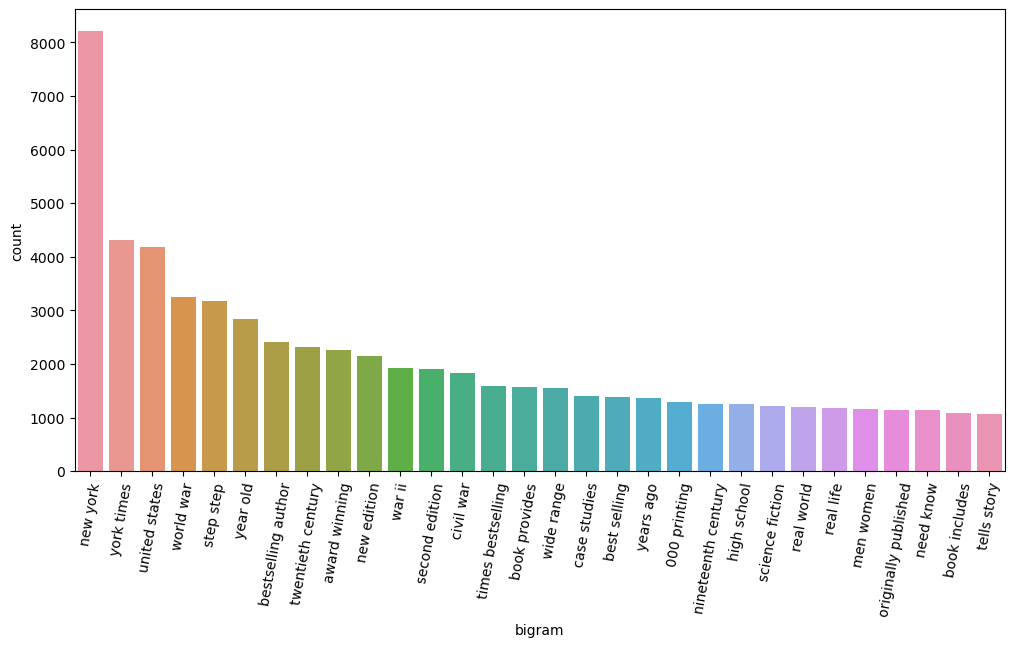

In [128]:
df2 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['bigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

### Top 30 Trigrams

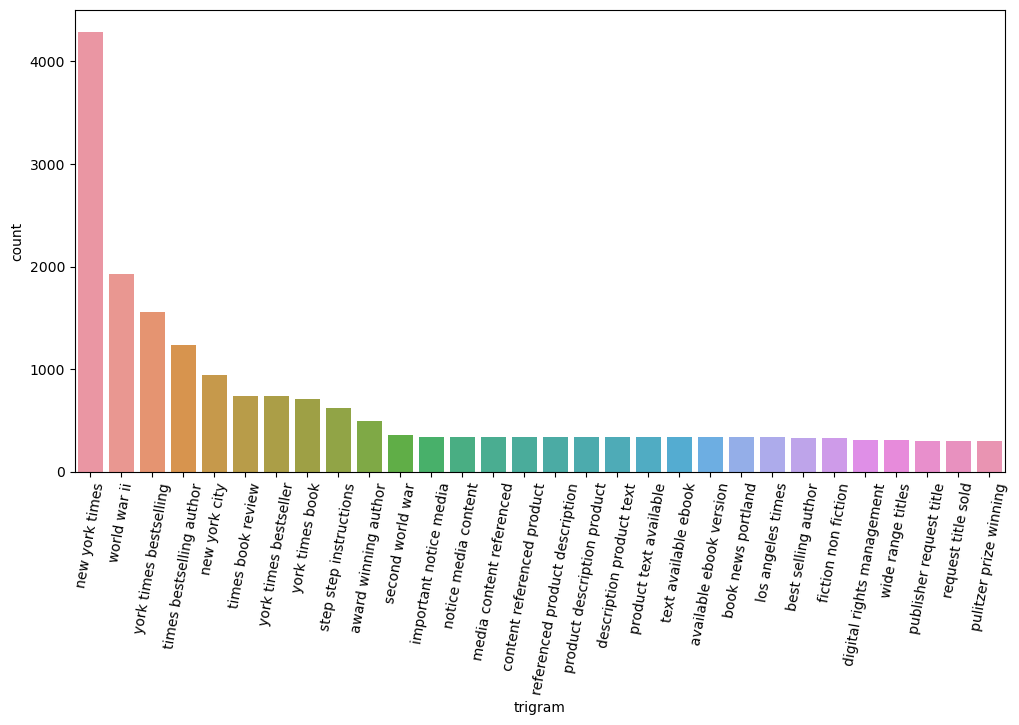

In [129]:
df3 = pd.DataFrame(top_30_trigrams, columns = ['trigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['trigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

### Word Cloud Analysis for Description


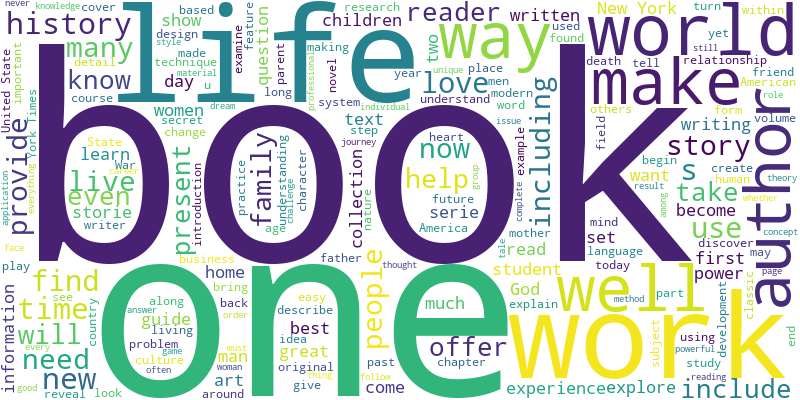

In [113]:
from wordcloud import WordCloud

all_text = ' '.join(filtered_df['description'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

fig_wordcloud = px.imshow(wordcloud)
fig_wordcloud.update_layout(title='Word Cloud Analysis for Description')
fig_wordcloud.show()

## Separate Labeled Data

In [6]:
labeled_df = filtered_df[filtered_df['ratingscount'].notnull()]
labeled_df.shape

(45127, 3)

* Separate the labeled data fro training the base model

In [7]:
labeled_df['ratingscount'] = labeled_df['ratingscount'].astype('int')
labeled_df['text'] = labeled_df['title'] + ' ' + labeled_df['description']
ldf = labeled_df[['text', 'ratingscount']]
ldf.head()

text  ratingscount
5   The Church of Christ: A Biblical Ecclesiology ...             5
31  Voices from the Farm: Adventures in Community ...             1
33  The Battleship Bismarck The Bismarck is perhap...             1
42  Tess and the Highlander In 1543, on a windswep...             2
43  Beginner's Yoruba (Hippocrene Beginner's Serie...             1

* Combined the title and description to make single text column it will be easier to clean and vectorize it.

In [8]:
def map_ratings(rating):
    return rating - 1
ldf['ratingscount'] = ldf['ratingscount'].apply(map_ratings)
ldf.head()

text  ratingscount
5   The Church of Christ: A Biblical Ecclesiology ...             4
31  Voices from the Farm: Adventures in Community ...             0
33  The Battleship Bismarck The Bismarck is perhap...             0
42  Tess and the Highlander In 1543, on a windswep...             1
43  Beginner's Yoruba (Hippocrene Beginner's Serie...             0

* Converting the ratings from [1 - 5] to [0 - 4]

## Text Preprocessing

In [9]:
X_train, X_test = train_test_split(ldf, test_size=0.2, random_state=111)

In [10]:
stemmer = nltk.stem.SnowballStemmer('english')

In [11]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [166]:
def tokenize(text):
   tokens = [word for word in nltk.word_tokenize(text) if (len(word) > 3)]
   tokens = map(str.lower, tokens)
   stems = [stemmer.stem(item) for item in tokens if (item not in stop_words)]
   return stems

* Tokenizinf and stemming the text

In [ ]:
#complaints_df['complaints_tok']=complaints_df['complaints'].apply(lambda x: tokenize(x))

In [13]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
train_vectors = vectorizer_tf.fit_transform(X_train.text)

* Fitting the vectorizer with max_df = 0.75 this will not include words which has term frequency less than 0.75 and max_features = 1000 will give top 1000 features. 

In [14]:
train_vectors.A

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08810449,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
len(vectorizer_tf.get_feature_names_out())

1000

In [16]:
test_vectors = vectorizer_tf.transform(X_test.text)

In [17]:
X_train.shape

(36101, 2)

### Creating train test dataframe from vectorized data

In [18]:
train_df=pd.DataFrame(train_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())
train_df=pd.concat([train_df,X_train['ratingscount'].reset_index(drop=True)], axis=1)
train_df

abil  abl  accept   access  acclaim  accompani  account  achiev  \
0       0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
1       0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
2       0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
3       0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
4       0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
...     ...  ...     ...      ...      ...        ...      ...     ...   
36096   0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
36097   0.0  0.0     0.0  0.14796      0.0        0.0      0.0     0.0   
36098   0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
36099   0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   
36100   0.0  0.0     0.0  0.00000      0.0        0.0      0.0     0.0   

         across  action  ...     write  writer   written  wrong      year  \
0      0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
1      0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
2      0.107743     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
3      0.000000     0.0  ...  0.101946     0.0  0.000000    0.0  0.000000   
4      0.000000     0.0  ...  0.000000     0.0  0.075536    0.0  0.057705   
...         ...     ...  ...       ...     ...       ...    ...       ...   
36096  0.000000     0.0  ...  0.000000     0.0  0.142692    0.0  0.000000   
36097  0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
36098  0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
36099  0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   
36100  0.000000     0.0  ...  0.000000     0.0  0.000000    0.0  0.000000   

           york  york time     young  —the  ratingscount  
0      0.000000   0.000000  0.000000   0.0             0  
1      0.000000   0.000000  0.000000   0.0             0  
2      0.000000   0.000000  0.000000   0.0             1  
3      0.000000   0.000000  0.000000   0.0             0  
4      0.070402   0.079109  0.000000   0.0             2  
...         ...        ...       ...   ...           ...  
36096  0.000000   0.000000  0.262995   0.0             4  
36097  0.000000   0.000000  0.000000   0.0             4  
36098  0.000000   0.000000  0.000000   0.0             0  
36099  0.000000   0.000000  0.088104   0.0             4  
36100  0.000000   0.000000  0.000000   0.0             0  

[36101 rows x 1001 columns]

In [19]:
test_df=pd.DataFrame(test_vectors.toarray(), columns=vectorizer_tf.get_feature_names_out())
test_df=pd.concat([test_df,X_test['ratingscount'].reset_index(drop=True)], axis=1)
test_df

abil       abl  accept    access   acclaim  accompani  account  \
0      0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
1      0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
2      0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
3      0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
4      0.0  0.000000     0.0  0.000000  0.153343        0.0      0.0   
...    ...       ...     ...       ...       ...        ...      ...   
9021   0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
9022   0.0  0.502555     0.0  0.000000  0.000000        0.0      0.0   
9023   0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
9024   0.0  0.000000     0.0  0.000000  0.000000        0.0      0.0   
9025   0.0  0.074036     0.0  0.130341  0.000000        0.0      0.0   

        achiev  across  action  ...  write  writer  written  wrong      year  \
0     0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
1     0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
2     0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
3     0.150082     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
4     0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.093581   
...        ...     ...     ...  ...    ...     ...      ...    ...       ...   
9021  0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
9022  0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
9023  0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
9024  0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   
9025  0.000000     0.0     0.0  ...    0.0     0.0      0.0    0.0  0.000000   

      york  york time     young  —the  ratingscount  
0      0.0        0.0  0.000000   0.0             4  
1      0.0        0.0  0.000000   0.0             4  
2      0.0        0.0  0.000000   0.0             0  
3      0.0        0.0  0.000000   0.0             0  
4      0.0        0.0  0.000000   0.0             0  
...    ...        ...       ...   ...           ...  
9021   0.0        0.0  0.000000   0.0             0  
9022   0.0        0.0  0.330479   0.0             2  
9023   0.0        0.0  0.000000   0.0             4  
9024   0.0        0.0  0.000000   0.0             1  
9025   0.0        0.0  0.000000   0.0             1  

[9026 rows x 1001 columns]

In [38]:
h2o_train_df = h2o.H2OFrame(train_df)
h2o_test_df = h2o.H2OFrame(test_df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


* Convert pandas data frame to H2O dataframe

In [39]:
h2o_train_df.types

{'abil': 'real',
 'abl': 'real',
 'accept': 'real',
 'access': 'real',
 'acclaim': 'real',
 'accompani': 'real',
 'account': 'real',
 'achiev': 'real',
 'across': 'real',
 'action': 'real',
 'activ': 'real',
 'actual': 'real',
 'addit': 'real',
 'address': 'real',
 'adult': 'real',
 'advanc': 'real',
 'adventur': 'real',
 'advic': 'real',
 'affect': 'real',
 'african': 'real',
 'age': 'real',
 'agent': 'real',
 'aliv': 'real',
 'allow': 'real',
 'almost': 'real',
 'alon': 'real',
 'along': 'real',
 'alreadi': 'real',
 'also': 'real',
 'alway': 'real',
 'america': 'real',
 'american': 'real',
 'among': 'real',
 'analysi': 'real',
 'ancient': 'real',
 'angel': 'real',
 'anim': 'real',
 'anoth': 'real',
 'answer': 'real',
 'anyon': 'real',
 'anyth': 'real',
 'apart': 'real',
 'appear': 'real',
 'appli': 'real',
 'applic': 'real',
 'approach': 'real',
 'area': 'real',
 'argu': 'real',
 'armi': 'real',
 'around': 'real',
 'arriv': 'real',
 'artist': 'real',
 'ask': 'real',
 'aspect': 'real'

In [44]:
h2o_train_df['ratingscount'] = h2o_train_df['ratingscount'].asfactor()
h2o_test_df['ratingscount'] = h2o_test_df['ratingscount'].asfactor()

## Training Base Model

In [45]:
aml = H2OAutoML(
    max_models = 10,
    seed = 10,
    exclude_algos = ["StackedEnsemble"],
    verbosity="info",
    nfolds=0,
    balance_classes=True,
    max_after_balance_size=0.3
)

* We will be using H2OAutoML to find the best base model for our dataset.

In [46]:
x=vectorizer_tf.get_feature_names_out()
y='ratingscount'

In [59]:
x = list(x)

In [60]:
aml.train(x = x, y = y, training_frame = h2o_train_df, validation_frame= h2o_test_df)

AutoML progress: |
21:45:34.746: Project: AutoML_1_20230813_214534
21:45:34.747: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:45:34.752: Setting stopping tolerance adaptively based on the training frame: 0.005263084999327537
21:45:34.752: Build control seed: 10
21:45:34.756: training frame: Frame key: AutoML_1_20230813_214534_training_py_2_sid_8d8f    cols: 1001    rows: 36101  chunks: 39    size: 16348997  checksum: 2365043142714662663
21:45:34.765: validation frame: Frame key: py_6_sid_8d8f    cols: 1001    rows: 9026  chunks: 10    size: 4099224  checksum: -8425361192324180509
21:45:34.767: leaderboard frame: Frame key: py_6_sid_8d8f    cols: 1001    rows: 9026  chunks: 10    size: 4099224  checksum: -8425361192324180509
21:45:34.768: blending frame: NULL
21:45:34.770: response column: ratingscount
21:45:34.770: fold column: null
21:45:34.770: weights column: null
21:45:34.823: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g,

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230813_214534


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.394168659757898
RMSE: 0.6278285273527303
LogLoss: 1.0680394254258527
Mean Per-Class Error: 0.6241559117405411
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0      1     2    3    4      Error     Rate
-----  ----  ---  ---  -----  --------  ---------------
13306  34    7    0    1278   0.090188  1,319 / 14,625
3858   956   8    1    1122   0.839193  4,989 / 5,945
2113   38    252  2    808    0.921569  2,961 / 3,213
1348   35    2    127  569    0.938972  1,954 / 2,081
3336   41    9    1    6850   0.330859  3,387 / 10,237
23961  1104  278  131  10627  0.404698  14,610 / 36,101

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.595302
2    0.803385
3    0.909892
4    0.972078
5    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.47469840010549536
RMSE: 0.6889835993008073
LogLoss: 1.313007869193576
Mean Per-Class Error: 0.7194565411032454
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1    2    3    4     Error     Rate
----  ---  ---  ---  ----  --------  -------------
2998  48   7    1    633   0.186873  689 / 3,687
1137  54   3    0    350   0.965026  1,490 / 1,544
515   22   11   0    249   0.986198  786 / 797
302   10   3    3    174   0.993902  489 / 492
1140  26   0    0    1340  0.465283  1,166 / 2,506
6092  160  24   4    2746  0.511855  4,620 / 9,026

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.488145
2    0.711389
3    0.857079
4    0.942943
5    1

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-08-13 21:45:35  0.095 sec         0                  0.8              1.60944             0.716434                         nan             nan                0.8                1.60944               0.722358                           nan               nan
    2023-08-13 21:45:53  18.217 sec        5                  0.716065         1.31747             0.497355                         nan             nan                0.730073           1.37409               0.536229                           nan               nan
    2023-08-13 21:46:01  26.932 sec        10                 0.684592         1.23947             0.481289                         nan             nan                0.707747           1.33262               0.530024                           nan               nan
    2023-08-13 21:46:19  44.018 sec        15                 0.668691         1.19735             0.463976                         nan             nan                0.699536           1.32153               0.522823     

In [61]:
aml.leaderboard

model_id                              mean_per_class_error    logloss      rmse       mse
----------------------------------  ----------------------  ---------  --------  --------
XGBoost_1_AutoML_1_20230813_214534                0.719457    1.31301  0.688984  0.474698
XGBoost_2_AutoML_1_20230813_214534                0.723769    1.31898  0.6923    0.479279
GLM_1_AutoML_1_20230813_214534                    0.732878    1.32537  0.698499  0.487901
XGBoost_3_AutoML_1_20230813_214534                0.732955    1.31801  0.696087  0.484537
GBM_1_AutoML_1_20230813_214534                    0.739049    1.33805  0.701853  0.492598
GBM_4_AutoML_1_20230813_214534                    0.748809    1.34815  0.706997  0.499845
GBM_2_AutoML_1_20230813_214534                    0.749113    1.34981  0.708052  0.501337
GBM_3_AutoML_1_20230813_214534                    0.750105    1.34753  0.706751  0.499497
XRT_1_AutoML_1_20230813_214534                    0.751073    1.34175  0.70751   0.500571
DRF_1_AutoML_1_20230813_214534                    0.751436    1.34198  0.707434  0.500462
[10 rows x 5 columns]

* We have XGBoost at the top 

In [62]:
pred=aml.leader.predict(h2o_test_df)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [63]:
aml.leader.model_performance(h2o_test_df)

ModelMetricsMultinomial: xgboost
** Reported on test data. **

MSE: 0.47469840010549536
RMSE: 0.6889835993008073
LogLoss: 1.313007869193576
Mean Per-Class Error: 0.7194565411032454
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1    2    3    4     Error     Rate
----  ---  ---  ---  ----  --------  -------------
2998  48   7    1    633   0.186873  689 / 3,687
1137  54   3    0    350   0.965026  1,490 / 1,544
515   22   11   0    249   0.986198  786 / 797
302   10   3    3    174   0.993902  489 / 492
1140  26   0    0    1340  0.465283  1,166 / 2,506
6092  160  24   4    2746  0.511855  4,620 / 9,026

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.488145
2    0.711389
3    0.857079
4    0.942943
5    1

* The Mean Squared Error (MSE) of 0.4747 indicates the average squared difference between predicted and actual values, while the Root Mean Squared Error (RMSE) of 0.6890 is the square root of MSE, representing the typical prediction error. These scores suggest that the XGBoost model's predictions are on average around 0.6890 units away from the true values, which indicates relatively moderate accuracy. 

In [64]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [66]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_1_20230813_214534


Model Summary: 
    number_of_trees
--  -----------------
    40

ModelMetricsMultinomial: xgboost
** Reported on train data. **

MSE: 0.394168659757898
RMSE: 0.6278285273527303
LogLoss: 1.0680394254258527
Mean Per-Class Error: 0.6241559117405411
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0      1     2    3    4      Error     Rate
-----  ----  ---  ---  -----  --------  ---------------
13306  34    7    0    1278   0.090188  1,319 / 14,625
3858   956   8    1    1122   0.839193  4,989 / 5,945
2113   38    252  2    808    0.921569  2,961 / 3,213
1348   35    2    127  569    0.938972  1,954 / 2,081
3336   41    9    1    6850   0.330859  3,387 / 10,237
23961  1104  278  131  10627  0.404698  14,610 / 36,101

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.595302
2    0.803385
3    0.909892
4    0.972078
5    1

ModelMetricsMultinomial: xgboost
** Reported on validation data. **

MSE: 0.47469840010549536
RMSE: 0.6889835993008073
LogLoss: 1.313007869193576
Mean Per-Class Error: 0.7194565411032454
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0     1    2    3    4     Error     Rate
----  ---  ---  ---  ----  --------  -------------
2998  48   7    1    633   0.186873  689 / 3,687
1137  54   3    0    350   0.965026  1,490 / 1,544
515   22   11   0    249   0.986198  786 / 797
302   10   3    3    174   0.993902  489 / 492
1140  26   0    0    1340  0.465283  1,166 / 2,506
6092  160  24   4    2746  0.511855  4,620 / 9,026

Top-5 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.488145
2    0.711389
3    0.857079
4    0.942943
5    1

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_logloss    training_classification_error    training_auc    training_pr_auc    validation_rmse    validation_logloss    validation_classification_error    validation_auc    validation_pr_auc
--  -------------------  ----------------  -----------------  ---------------  ------------------  -------------------------------  --------------  -----------------  -----------------  --------------------  ---------------------------------  ----------------  -------------------
    2023-08-13 21:45:35  0.095 sec         0                  0.8              1.60944             0.716434                         nan             nan                0.8                1.60944               0.722358                           nan               nan
    2023-08-13 21:45:53  18.217 sec        5                  0.716065         1.31747             0.497355                         nan             nan                0.730073           1.37409               0.536229                           nan               nan
    2023-08-13 21:46:01  26.932 sec        10                 0.684592         1.23947             0.481289                         nan             nan                0.707747           1.33262               0.530024                           nan               nan
    2023-08-13 21:46:19  44.018 sec        15                 0.668691         1.19735             0.463976                         nan             nan                0.699536           1.32153               0.522823     

In [67]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'multi:softprob',
  'min_child_weight': 10.0,
  'nthread': 2,
  'seed': 10,
  'num_class': 5,
  'max_depth': 15,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.6,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 40)

## Manual Training XGBoost

In [20]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=15, objective='multi:softprob', random_state=10)

In [22]:
xgb_clf.fit(train_vectors, X_train['ratingscount'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [23]:
predictions = xgb_clf.predict(test_vectors)

In [24]:
cm = confusion_matrix(X_test['ratingscount'], predictions)
print(cm)

[[3144    8    3    1  531]
 [1193   56    0    0  295]
 [ 567    7    9    0  214]
 [ 345    1    1    4  141]
 [1224   14    0    0 1268]]


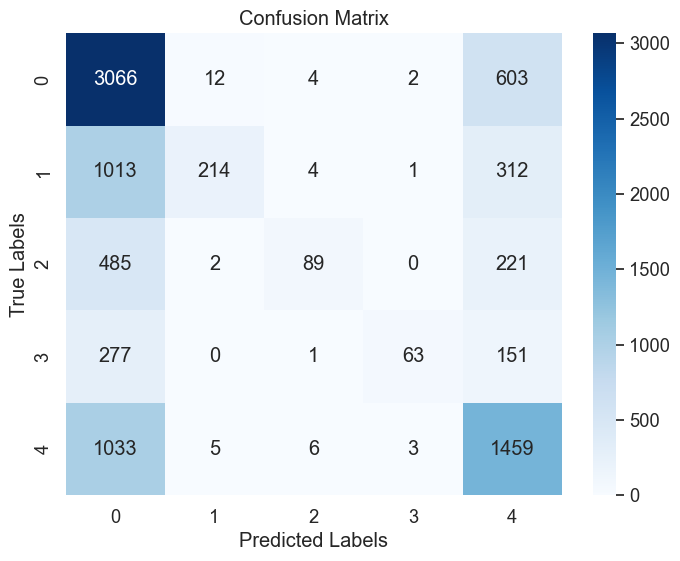

In [191]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix')
plt.show()

In [25]:
print('classification_report :\n',classification_report(X_test['ratingscount'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.49      0.85      0.62      3687
           1       0.65      0.04      0.07      1544
           2       0.69      0.01      0.02       797
           3       0.80      0.01      0.02       492
           4       0.52      0.51      0.51      2506

    accuracy                           0.50      9026
   macro avg       0.63      0.28      0.25      9026
weighted avg       0.56      0.50      0.41      9026



* The model's performance appears to vary significantly across different classes. While it achieves reasonably high precision for class 0 and class 4, the low recall and F1-scores for other classes suggest challenges in correctly identifying instances. Overall, the model's accuracy is moderate

## Using Class Weight to handle Class Imbalance

In [130]:
value_counts = filtered_df['ratingscount'].value_counts()
fig_ratings = px.bar(value_counts, title='Class Balance')
fig_ratings.show()

* The depicted bar chart reveals a noticeable class imbalance, with a significant portion of the data concentrated in ratings 1 and 5. In light of this observation, during the model training process, we will implement class weighting techniques. This approach will allow the models to appropriately account for the imbalanced distribution, ensuring fair representation and accurate predictions across all ratings categories.

In [26]:
from sklearn.utils import class_weight
class_weights = list(class_weight.compute_class_weight(class_weight='balanced',
                                             classes = np.unique(ldf['ratingscount']),
                                             y = ldf['ratingscount']))

In [27]:
class_weights

[0.49286806465705546,
 1.2051542261984243,
 2.25072319201995,
 3.5077341624562766,
 0.70826336027623]

In [28]:
weights = np.ones(X_train.shape[0], dtype = 'float')

In [29]:
for i, val in enumerate(X_train['ratingscount']):
    weights[i] = class_weights[val]

In [30]:
xgb_clf = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=15, objective='multi:softprob', random_state=10)

In [31]:
xgb_clf.fit(train_vectors, X_train['ratingscount'], sample_weight=weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [32]:
predictions = xgb_clf.predict(test_vectors)

In [33]:
cm = confusion_matrix(X_test['ratingscount'], predictions)
print(cm)

[[2091  451  226  269  650]
 [ 630  351  105  107  351]
 [ 276  101  126   74  220]
 [ 152   48   40   94  158]
 [ 571  205  166  182 1382]]


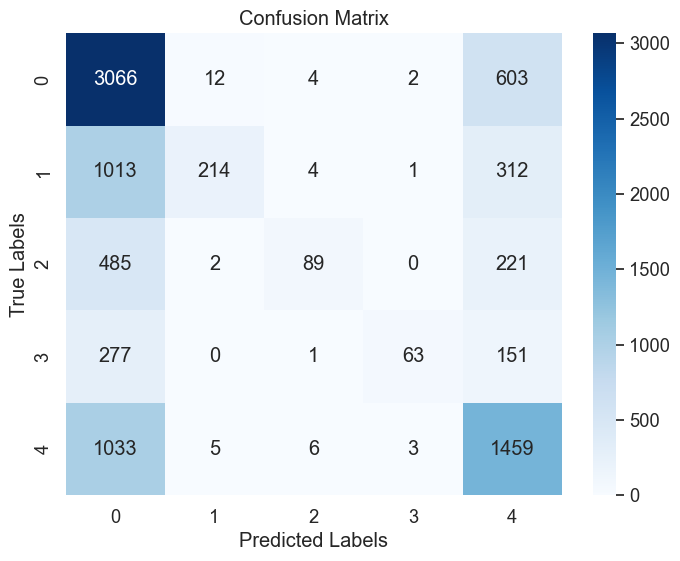

In [190]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix')
plt.show()

In [34]:
print('classification_report :\n',classification_report(X_test['ratingscount'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.56      0.57      0.56      3687
           1       0.30      0.23      0.26      1544
           2       0.19      0.16      0.17       797
           3       0.13      0.19      0.15       492
           4       0.50      0.55      0.52      2506

    accuracy                           0.45      9026
   macro avg       0.34      0.34      0.34      9026
weighted avg       0.44      0.45      0.44      9026



* The model with class weights demonstrates a more balanced performance across classes compared to the previous model. While precision and recall have generally improved, indicating better class prediction, the model's overall accuracy remains moderate.

## Training More Models

In [35]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
nb_classifier = MultinomialNB()
nb_classifier.fit(train_vectors, X_train['ratingscount'], sample_weight=weights)

MultinomialNB()

In [38]:
predictions = nb_classifier.predict(test_vectors)

In [39]:
cm = confusion_matrix(X_test['ratingscount'], predictions)
print(cm)

[[1742  287  286  431  941]
 [ 595  151  115  189  494]
 [ 260   62   65  104  306]
 [ 143   28   41   67  213]
 [ 457  141  174  278 1456]]


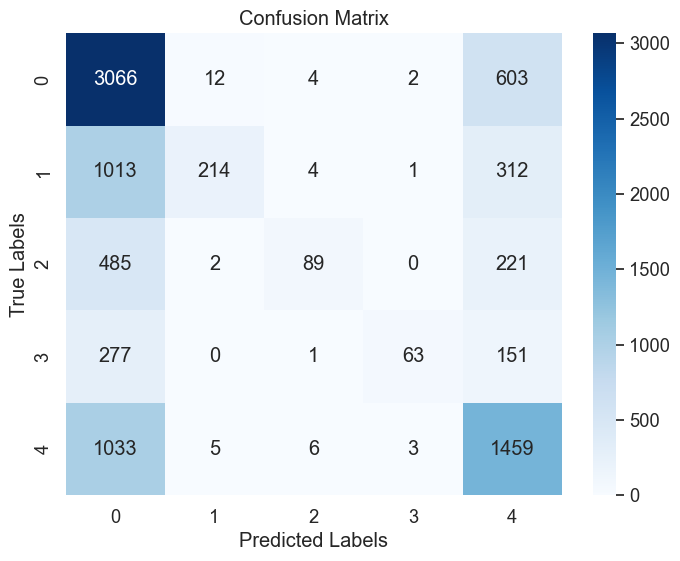

In [189]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix')
plt.show()

In [40]:
print('classification_report :\n',classification_report(X_test['ratingscount'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.54      0.47      0.51      3687
           1       0.23      0.10      0.14      1544
           2       0.10      0.08      0.09       797
           3       0.06      0.14      0.09       492
           4       0.43      0.58      0.49      2506

    accuracy                           0.39      9026
   macro avg       0.27      0.27      0.26      9026
weighted avg       0.39      0.39      0.38      9026



In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(train_vectors, X_train['ratingscount'])

RandomForestClassifier(random_state=42)

In [42]:
predictions = rf_classifier.predict(test_vectors)

In [43]:
cm = confusion_matrix(X_test['ratingscount'], predictions)
print(cm)

[[2970   14    4    2  697]
 [ 987  209    4    1  343]
 [ 460    1   91    0  245]
 [ 260    0    1   67  164]
 [ 960    4    2    2 1538]]


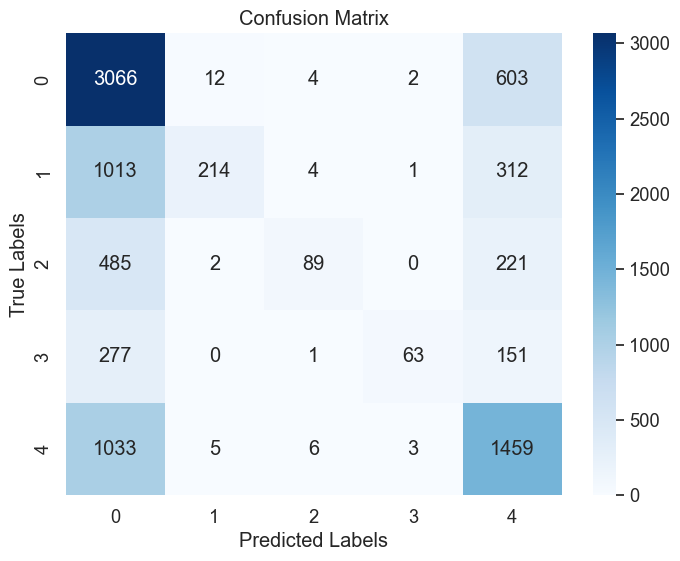

In [188]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix')
plt.show()

In [44]:
print('classification_report :\n',classification_report(X_test['ratingscount'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.53      0.81      0.64      3687
           1       0.92      0.14      0.24      1544
           2       0.89      0.11      0.20       797
           3       0.93      0.14      0.24       492
           4       0.51      0.61      0.56      2506

    accuracy                           0.54      9026
   macro avg       0.76      0.36      0.37      9026
weighted avg       0.64      0.54      0.49      9026



In [45]:
rf_classifier.fit(train_vectors, X_train['ratingscount'], sample_weight=weights)

RandomForestClassifier(random_state=42)

In [46]:
predictions = rf_classifier.predict(test_vectors)

In [47]:
cm = confusion_matrix(X_test['ratingscount'], predictions)
print(cm)

[[3066   12    4    2  603]
 [1013  214    4    1  312]
 [ 485    2   89    0  221]
 [ 277    0    1   63  151]
 [1033    5    6    3 1459]]


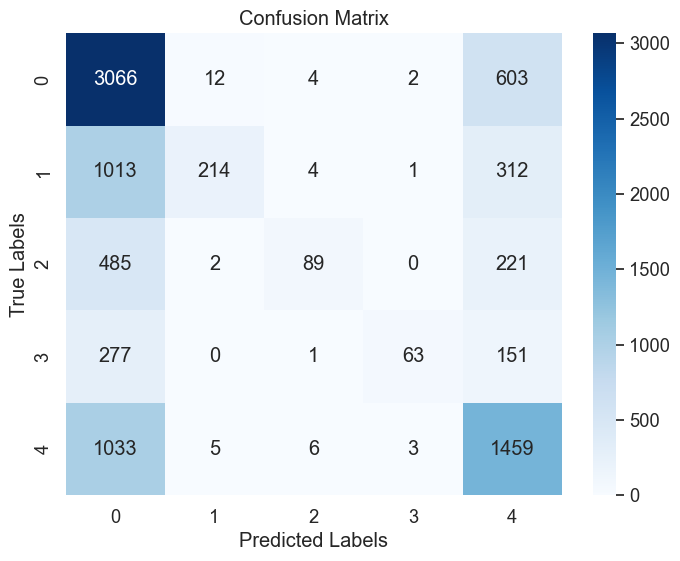

In [184]:
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1", "2", "3", "4"], yticklabels=["0", "1", "2", "3", "4"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title(f'Confusion Matrix')
plt.show()

In [48]:
print('classification_report :\n',classification_report(X_test['ratingscount'], predictions))

classification_report :
               precision    recall  f1-score   support

           0       0.52      0.83      0.64      3687
           1       0.92      0.14      0.24      1544
           2       0.86      0.11      0.20       797
           3       0.91      0.13      0.22       492
           4       0.53      0.58      0.56      2506

    accuracy                           0.54      9026
   macro avg       0.75      0.36      0.37      9026
weighted avg       0.64      0.54      0.49      9026



* We have selected the Random Forest model as the main base model due to its improved performance in terms of accuracy compared to the previous models. The classification report indicates that the Random Forest model exhibits higher precision, recall, and F1-score for most classes, resulting in an overall accuracy of 54%. While the model's macro and weighted average metrics have also improved, there is still room for enhancement, particularly in addressing class imbalances and further optimizing its performance for better overall accuracy.

# Semi Supervised Learning

In [65]:
filtered_df['text'] = filtered_df['title'] + ' ' + filtered_df['description']
full_df = filtered_df[['text', 'ratingscount']]
full_df.head()

text  ratingscount
1  Dr. Seuss: American Icon Philip Nel takes a fa...           NaN
2  Wonderful Worship in Smaller Churches This res...           NaN
3  Whispers of the Wicked Saints Julia Thomas fin...           NaN
5  The Church of Christ: A Biblical Ecclesiology ...           5.0
8  Saint Hyacinth of Poland The story for childre...           NaN

In [66]:
def map_ratings(rating):
    if rating != np.nan:
        return rating - 1
full_df['ratingscount'] = full_df['ratingscount'].apply(map_ratings)
full_df.head()

text  ratingscount
1  Dr. Seuss: American Icon Philip Nel takes a fa...           NaN
2  Wonderful Worship in Smaller Churches This res...           NaN
3  Whispers of the Wicked Saints Julia Thomas fin...           NaN
5  The Church of Christ: A Biblical Ecclesiology ...           4.0
8  Saint Hyacinth of Poland The story for childre...           NaN

In [67]:
full_df['ratingscount'] = full_df['ratingscount'].fillna(-1)
full_df.head()

text  ratingscount
1  Dr. Seuss: American Icon Philip Nel takes a fa...          -1.0
2  Wonderful Worship in Smaller Churches This res...          -1.0
3  Whispers of the Wicked Saints Julia Thomas fin...          -1.0
5  The Church of Christ: A Biblical Ecclesiology ...           4.0
8  Saint Hyacinth of Poland The story for childre...          -1.0

* filling unlabled data with -1 for feeding this to model

In [68]:
full_df['ratingscount'] = full_df['ratingscount'].astype('int')
full_df.head()

text  ratingscount
1  Dr. Seuss: American Icon Philip Nel takes a fa...            -1
2  Wonderful Worship in Smaller Churches This res...            -1
3  Whispers of the Wicked Saints Julia Thomas fin...            -1
5  The Church of Christ: A Biblical Ecclesiology ...             4
8  Saint Hyacinth of Poland The story for childre...            -1

In [69]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143962 entries, 1 to 212403
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          143962 non-null  object
 1   ratingscount  143962 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 2.7+ MB


In [70]:
full_df.describe()

ratingscount
count  143962.000000
mean       -0.171122
std         1.548492
min        -1.000000
25%        -1.000000
50%        -1.000000
75%         0.000000
max         4.000000

In [72]:
vectorizer_tf = TfidfVectorizer(tokenizer=tokenize, stop_words=None, max_df=0.75, max_features=1000, lowercase=False, ngram_range=(1,2))
full_vectors = vectorizer_tf.fit_transform(full_df.text)

* Training same vectorizer again with same params

In [73]:
target = full_df['ratingscount']

In [74]:
from sklearn.semi_supervised import SelfTrainingClassifier

## Training SelfTrainingClassifier

In [75]:
rf_classifier = RandomForestClassifier(random_state=42)

In [182]:
ssl = SelfTrainingClassifier(rf_classifier, threshold=0.6)

In [183]:
ssl.fit(full_vectors, target)

SelfTrainingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                       threshold=0.6)

In [186]:
ssl.score(full_vectors, target)

0.31281866047984885

In [92]:
sample1_description = """This is the credo and seminal text of the movement which was later characterized as liberation theology. The book burst upon the scene in the early seventies, and was swiftly acknowledged as a pioneering and prophetic approach to theology which famously made an option for the poor, placing the exploited, the alienated, and the economically wretched at the centre of a programme where "the oppressed and maimed and blind and lame" were prioritized at the expense of those who either maintained the status quo or who abused the structures of power for their own ends. This powerful, compassionate and radical book attracted criticism for daring to mix politics and religion in so explicit a manner, but was also welcomed by those who had the capacity to see that its agenda was nothing more nor less than to give "good news to the poor", and redeem God's people from bondage."""
sapmple_vactor = vectorizer_tf.transform([sample1_description])

In [93]:
ssl.predict(sapmple_vactor)

array([1])

In [147]:
ssl.score(full_vectors, target)

0.3128394993123185

## Training LabelPropagation

In [131]:
from sklearn.semi_supervised import LabelPropagation

lp = LabelPropagation()

In [152]:
num_rows = full_vectors.shape[0]
chunk_size = 10000
chunked_matrices = [full_vectors[i:i + chunk_size, :] for i in range(0, num_rows, chunk_size)]
chunked_labels = [target[i:i + chunk_size] for i in range(0, len(target), chunk_size)]

In [144]:
for chunk_matrix, chunk_label in zip(chunked_matrices, chunked_labels):
    lp.fit(chunk_matrix.todense(), chunk_label)

In [146]:
lp.score(full_vectors, target)

0.13279893305177756

## Training LabelSpreading

In [149]:
from sklearn.semi_supervised import LabelSpreading

ls = LabelSpreading()

In [156]:
for chunk_matrix, chunk_label in zip(chunked_matrices, chunked_labels):
    ls.fit(chunk_matrix.todense(), chunk_label)

done
done
done
done
done
done
done
done
done
done
done
done
done
done
done


In [154]:
ls.score(full_vectors, target)

0.13089565301954684

In [158]:
model = LabelSpreading()
param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Example values for hyperparameter alpha
    'max_iter': [10, 20, 30]   # Example values for hyperparameter max_iter
}
grid_search = GridSearchCV(model, param_grid, cv=3)

In [159]:
for chunk_matrix, chunk_label in zip(chunked_matrices, chunked_labels):
    grid_search.fit(chunk_matrix.todense(), chunk_label)

In [160]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'alpha': 0.5, 'max_iter': 10}
Best Score: 0.13048960460012693


## Saving Models

In [94]:
import joblib

In [187]:
joblib.dump(ssl, 'self_training_classifier0.6.pkl')

['self_training_classifier0.6.pkl']

In [171]:
joblib.dump(vectorizer_tf, 'tfidf_vectorizer1.pkl')

['tfidf_vectorizer1.pkl']

In [145]:
joblib.dump(lp, 'label_propagation_classifier.pkl')

['label_propagation_classifier.pkl']

In [155]:
joblib.dump(ls, 'label_spreading_classifier.pkl')

['label_spreading_classifier.pkl']

## Underfit Discussion: Self-Training Model with 31% Accuracy

The Self-TrainingClassifier, despite achieving an accuracy of 31% in our book rating prediction project, has demonstrated signs of underfitting. Underfitting occurs when a model lacks the complexity to capture intricate patterns within the data, leading to oversimplified predictions. In our case, limited labeled data (31%) and the inherent complexity of textual features could contribute to this phenomenon.

#### To address underfitting, future endeavors could focus on:

##### Feature Engineering: 
* Utilizing advanced feature extraction methods like TF-IDF or word embeddings to capture the nuances in book descriptions more effectively.

##### Model Optimization: 
* Experimenting with different model architectures and hyperparameter tuning to enhance the model's capacity to understand complex relationships.

##### Ensemble Techniques: 
* Combining the strengths of multiple models, including supervised and semi-supervised, could help overcome underfitting by capturing a wider range of patterns.

Mitigating underfitting in the Self-Training model is crucial to harness its full potential and elevate the accuracy of book rating predictions.

# Conclusions and Future Work





In our pursuit of advancing book rating predictions through the integration of predictive analytics and semi-supervised learning, we embarked on a comprehensive exploration that has unveiled a spectrum of insights and opportunities. Our journey began with the manual selection of the Random Forest as the baseline model, achieving an accuracy of 54%, surpassing automated alternatives. Through the strategic implementation of class weights, we successfully mitigated class imbalance, enhancing the model's holistic rating prediction capabilities. The apex of our exploration led us to the realm of semi-supervised learning, where the SelfTrainingClassifier emerged as a promising avenue, boasting an accuracy of approximately 31%. This accomplishment highlights the potential of leveraging unlabeled data to augment predictive outcomes.

## Future Endeavors:


While our current study has illuminated promising paths and achieved substantial advancements, there remain untapped realms to explore in future research. The application of more advanced natural language processing techniques could enrich the preprocessing phase, enabling deeper semantic understanding of book descriptions. Additionally, investigating ensemble methods and hybrid approaches that combine the strengths of various models could potentially yield even higher accuracy rates. Delving into fine-tuned hyperparameter optimization, model ensembles, and novel feature engineering strategies could further refine the predictive power of our models. Moreover, the study's implications extend beyond rating predictions; future work could encompass the integration of user behavior, sentiment analysis, and contextual data for a more comprehensive and personalized recommendation framework. The uncharted territories of deep learning architectures and transfer learning also beckon exploration, offering the potential to unlock new dimensions of predictive accuracy. As our project lays the foundation for enhanced book recommendations, the future holds the promise of continued innovation and evolution within this captivating domain.

In conclusion, our study has propelled us toward a deeper understanding of the intricacies surrounding book rating predictions. Through meticulous experimentation and innovative methodologies, we have charted a course toward enhanced accuracy and enriched user experiences. As we set our sights on unexplored horizons and continued exploration, our endeavor stands as a testament to the dynamic fusion of data science and literature, fueling the evolution of predictive analytics into a new era of discovery and engagement.